In [1]:
# Streamlined imports for modular analytics
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import os

# Add src to path for modular imports
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

# Import our clean, modular analytics components
from analytics import (
    VendorDataLoader, VendorAnalyticsEngine, RiskAssessment,
    DashboardGenerator, ReportExporter
)

pd.set_option('display.max_columns', None)

print(" ETHIOMART VENDOR SCORECARD")
print(" Modular FinTech Analytics Engine")
print(f" {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print(" All analytics modules loaded ✅")
print("=" * 50)


 ETHIOMART VENDOR SCORECARD
 Modular FinTech Analytics Engine
 2025-06-22 17:01
 All analytics modules loaded ✅


In [2]:
# Initialize data loader and load vendor data
data_loader = VendorDataLoader()
df, data_source = data_loader.load_vendor_data()

# Validate and get summary
if data_loader.validate_data_structure(df):
    summary = data_loader.get_data_summary(df)
    
    print(f"\n DATASET LOADED ({data_source.upper()})")
    print(f" Messages: {summary['total_messages']} | Vendors: {summary['unique_vendors']}")
    print(f" Period: {summary['date_range']['start']} to {summary['date_range']['end']}")
    print(f" Categories: {len(summary['categories'])}")
    print(f" Avg Views: {summary['avg_views']:.1f}")
    
    display(df.head(3))
else:
    print(" Data validation failed")
    exit()


🔄 Loading vendor data...
⚠️  Database error: unable to open database file...
📊 DEMO MODE: Creating comprehensive sample data
✨ Sample data: 29 messages from 5 vendors
✅ Data structure validation passed

 DATASET LOADED (SAMPLE)
 Messages: 29 | Vendors: 5
 Period: 2025-01-08 to 2025-01-15
 Categories: 5
 Avg Views: 2219.0


,channel,channel_title,category,business_model,target_market,text,views,date,entities
0,@EthioFashionHub,Ethiopian Fashion Hub,Fashion & Clothing,Fashion Retailer,Mid-range,የሴቶች ቦርሳ በጣም ጥሩ ዋጋ 2500 ብር ቦሌ ውስጥ ይገኛል,1850,2025-01-15,"{""products"": [""\u1266\u122d\u1233""], ""prices"":..."
1,@EthioFashionHub,Ethiopian Fashion Hub,Fashion & Clothing,Fashion Retailer,Mid-range,ጫማ collection ዋጋ 3000 ብር የተለያዩ ቀለም አዲስ አበባ,1200,2025-01-14,"{""products"": [""\u132b\u121b"", ""collection""], ""..."
2,@EthioFashionHub,Ethiopian Fashion Hub,Fashion & Clothing,Fashion Retailer,Mid-range,የወንዶች ሸሚዝ premium quality ዋጋ 1800 ብር,980,2025-01-13,"{""products"": [""\u1238\u121a\u12dd"", ""premium"",..."


In [3]:
# Process all vendors with comprehensive analytics
analytics_engine = VendorAnalyticsEngine()
vendor_analytics = analytics_engine.process_all_vendors(df, verbose=True)
metrics_df = analytics_engine.create_metrics_dataframe(vendor_analytics)

# Get summary statistics
summary_stats = analytics_engine.get_summary_statistics(metrics_df)

print(f"\n ANALYTICS SUMMARY")
print(f" Top: {summary_stats['top_performer']['title']} ({summary_stats['top_performer']['score']})")
print(f" Avg Score: {summary_stats['avg_lending_score']}")
print(f" Eligible: {summary_stats['eligible_vendors']}/{summary_stats['total_vendors']}")

display(metrics_df[['channel_title', 'lending_score', 'avg_views_per_post', 
                   'posts_per_week', 'avg_price_etb']].head())


🔄 CALCULATING COMPREHENSIVE VENDOR METRICS
✅ Ethiopian Fashion Hub          | Score:  77.9
✅ Addis Electronics Center       | Score:  82.1
✅ Merkato General Market         | Score:  59.8
✅ Bole Premium Shopping Center   | Score:  87.1
✅ Hawassa Beauty & Care          | Score:  69.7
🎉 ANALYSIS COMPLETE: 5 vendors processed

 ANALYTICS SUMMARY
 Top: Bole Premium Shopping Center (87.1)
 Avg Score: 75.3
 Eligible: 5/5


,channel_title,lending_score,avg_views_per_post,posts_per_week,avg_price_etb
@BolePremiumShopping,Bole Premium Shopping Center,87.1,4257.1,8.17,52450.0
@AddisElectronics,Addis Electronics Center,82.1,2883.3,8.4,14816.67
@EthioFashionHub,Ethiopian Fashion Hub,77.9,1316.2,8.0,2300.0
@HawassaBeautyShop,Hawassa Beauty & Care,69.7,1180.0,9.33,1851.43
@MerkatoGeneralStore,Merkato General Market,59.8,500.0,9.33,1142.86


In [4]:
# Process risk assessment for entire portfolio
risk_assessor = RiskAssessment()
enhanced_metrics_df = risk_assessor.process_vendor_portfolio(metrics_df)
portfolio_summary = risk_assessor.get_portfolio_risk_summary(enhanced_metrics_df)

print(" RISK ASSESSMENT COMPLETE")
print(f" Total: {portfolio_summary['total_vendors']} | Eligible: {portfolio_summary['eligible_vendors']}")
print(f" Approval Rate: {portfolio_summary['approval_rate']:.1f}%")
print(f" Portfolio: {portfolio_summary['total_portfolio_value']:,} ETB")

print(f"\n Risk Distribution:")
for risk_level, count in portfolio_summary['risk_distribution'].items():
    print(f"   • {risk_level.replace('_', ' ')}: {count}")

display(enhanced_metrics_df[['channel_title', 'lending_score', 'risk_category', 
                            'recommended_loan_etb']].head())


 RISK ASSESSMENT COMPLETE
 Total: 5 | Eligible: 5
 Approval Rate: 100.0%
 Portfolio: 307,000 ETB

 Risk Distribution:
   • LOW RISK: 3
   • MEDIUM RISK: 2


,channel_title,lending_score,risk_category,recommended_loan_etb
channel,,,,
@BolePremiumShopping,Bole Premium Shopping Center,87.1,LOW_RISK,100000
@AddisElectronics,Addis Electronics Center,82.1,LOW_RISK,100000
@EthioFashionHub,Ethiopian Fashion Hub,77.9,LOW_RISK,53000
@HawassaBeautyShop,Hawassa Beauty & Care,69.7,MEDIUM_RISK,38000
@MerkatoGeneralStore,Merkato General Market,59.8,MEDIUM_RISK,16000


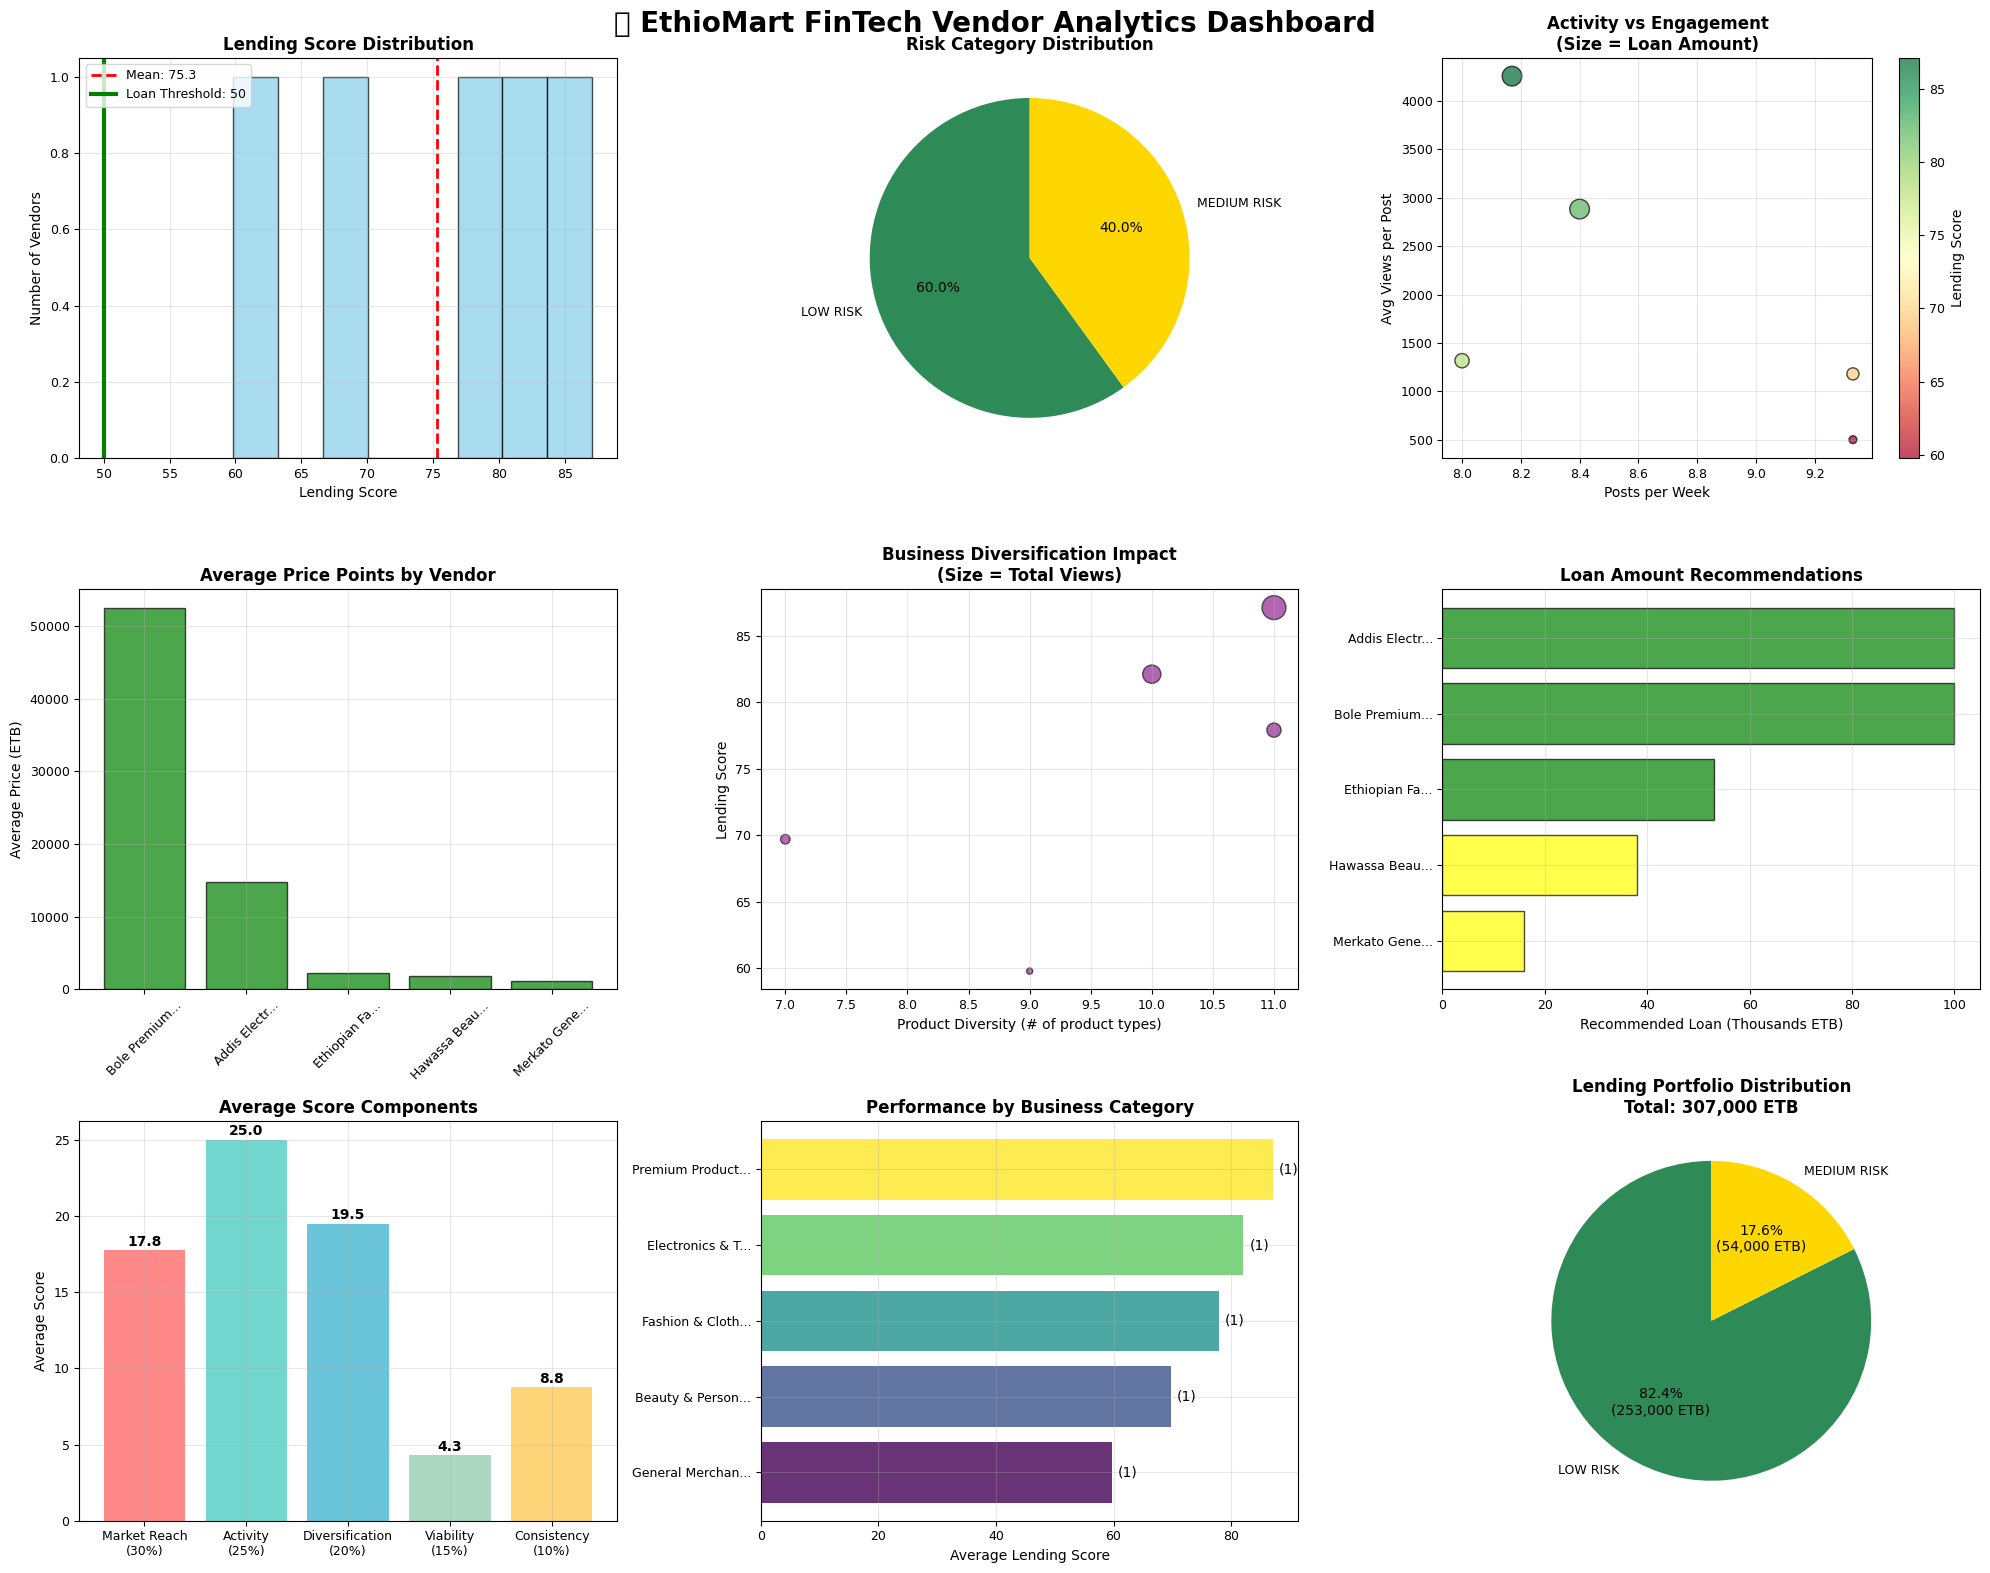


📈 DASHBOARD INSIGHTS
🏆 Top Performer: Bole Premium Shopping Center (Score: 87.1)
📊 Score Range: 59.8 - 87.1
💰 Loan Portfolio: 307,000 ETB
🎯 Approval Rate: 5/5 (100.0%)
🏪 Best Category: Premium Products


In [5]:
# Generate comprehensive BI dashboard
dashboard = DashboardGenerator()
fig = dashboard.generate_comprehensive_dashboard(enhanced_metrics_df, data_source)
plt.show()

# Print insights
dashboard.print_dashboard_insights(enhanced_metrics_df)


In [6]:
# Export all comprehensive reports
exporter = ReportExporter()
exported_files = exporter.export_all_reports(enhanced_metrics_df, data_source, df)

# Show export summary
export_summary = exporter.create_export_summary(exported_files, enhanced_metrics_df)
print(export_summary)

# Export manifest
manifest = exporter.get_export_manifest()
print(f"\n Export Details:")
print(f"   Timestamp: {manifest['export_timestamp']}")
print(f"   Path: {manifest['export_path']}")
print(f"   Files: {manifest['total_files']}")


💾 EXPORTING COMPREHENSIVE VENDOR SCORECARD
✅ Main Scorecard: lending_scorecard_20250622_1701.csv
✅ Approved Loans: approved_loans_20250622_1701.csv (5 vendors)
✅ Analytics JSON: vendor_analytics_20250622_1701.json
✅ Business Summary: business_summary_20250622_1701.json
✅ Executive Report: executive_report_20250622_1701.txt

📁 ALL FILES EXPORTED TO: data/vendor_analytics
📊 Total Files Created: 5
💾 Export Timestamp: 20250622_1701
🎉 TASK 6 IMPLEMENTATION COMPLETE!
✅ Vendor Analytics Engine: OPERATIONAL
✅ Lending Scorecard System: COMPLETE
✅ Risk Assessment Framework: IMPLEMENTED
✅ Business Intelligence Dashboard: GENERATED
✅ Export and Reporting System: ALL FILES CREATED
🏦 EthioMart FinTech Micro-Lending System Ready for Production!

📂 KEY FILES:
   scorecard_csv: lending_scorecard_20250622_1701.csv
   approved_loans_csv: approved_loans_20250622_1701.csv
   analytics_json: vendor_analytics_20250622_1701.json
   summary_json: business_summary_20250622_1701.json
   executive_report: executi

In [7]:
# Generate executive scorecard for top 3 vendors
detailed_scorecard = risk_assessor.generate_detailed_scorecard(enhanced_metrics_df, max_vendors=3)
print(detailed_scorecard)

print(f"\n{'='*50}")
print(" EXECUTIVE SUMMARY")
print(f"{'='*50}")

for idx, (_, vendor) in enumerate(enhanced_metrics_df.head(3).iterrows(), 1):
    recommendations = vendor['lending_recommendations']
    print(f"\n #{idx}: {vendor['channel_title']}")
    print(f"   Decision: {recommendations['decision']}")
    print(f"   Terms: {recommendations['terms']}")
    print(f"   Monitoring: {recommendations['monitoring']}")


🏦 ETHIOMART FINTECH VENDOR SCORECARD
📅 Analysis Date: 2025-06-22 17:01
📊 Total Vendors Analyzed: 5
💰 Total Lending Portfolio: 307,000 ETB
🎯 Loan Approval Threshold: Score ≥ 50

🏅 RANK #1: BOLE PREMIUM SHOPPING CENTER
📺 Channel: @BolePremiumShopping
🏪 Category: Premium Products | Business: Luxury Retailer
🎯 Target Market: Premium

🔥 LENDING SCORE: 87.1/100
🟢 RISK LEVEL: Excellent lending candidate
💰 RECOMMENDED LOAN: 100,000 ETB

--------------------------------------------------------------------------------

🏅 RANK #2: ADDIS ELECTRONICS CENTER
📺 Channel: @AddisElectronics
🏪 Category: Electronics & Technology | Business: Electronics Retailer
🎯 Target Market: High-end

🔥 LENDING SCORE: 82.1/100
🟢 RISK LEVEL: Excellent lending candidate
💰 RECOMMENDED LOAN: 100,000 ETB

--------------------------------------------------------------------------------

🏅 RANK #3: ETHIOPIAN FASHION HUB
📺 Channel: @EthioFashionHub
🏪 Category: Fashion & Clothing | Business: Fashion Retailer
🎯 Target Market: Mi